In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("data/transactions.csv")

In [7]:
train = pd.read_csv("data/train.csv", index_col=0)

In [9]:
train

,client_id,gender
0,c5f18a1d1d83fda62e51e6ae1d7b8911,1
1,4b6861803556de90249e13d7cf66f0a9,0
2,7d3f908e1cd1e3624a1445df5e04c4fa,1
3,40c585a809c1bd17dc6d283d61acd2d2,0
4,5bd2ff9f6c591353577488b0dfca6dea,0
...,...,...
7555,596baadc284cb94a91c1fdd7a422a022,0
7556,9b317a4cff6bb3b630cd966f68db410b,0
7557,eb3b544e3c5293739f09dcd71a649b18,0
7558,e1c1a70bfcb000d1188745cef71b3b61,0


In [11]:
df = df.merge(train)

In [39]:
df.head()

,client_id,trans_time,mcc_code,trans_type,amount,term_id,trans_city,gender
0,d1bbbc9a0e0410d3cf12a3d2f44f3450,35 08:24:41,4829,2370,-1808.56,NaN,Tver,0
1,d1bbbc9a0e0410d3cf12a3d2f44f3450,105 12:57:32,4829,2370,-3390.41,NaN,Tver,0
2,d1bbbc9a0e0410d3cf12a3d2f44f3450,455 19:32:01,4814,1030,-144.50,889003,Tver,0
3,d1bbbc9a0e0410d3cf12a3d2f44f3450,83 09:22:26,6011,2010,-3542.30,NaN,Tver,0
4,d1bbbc9a0e0410d3cf12a3d2f44f3450,74 13:31:57,6011,2010,-3542.70,NaN,Tver,0


In [45]:
df.isna().sum()

client_id           0
trans_time          0
mcc_code            0
trans_type          0
amount              0
term_id       1311048
trans_city          0
gender              0
dtype: int64

In [25]:
lower, upper = df["amount"].quantile(0.01), df["amount"].quantile(0.99)

In [27]:
upper

21693.05

(array([  2786.,   6898.,  24607., 124035., 329192., 373784., 271989.,
        222219., 101951., 103643.]),
 array([ 0.        ,  1.02724768,  2.05449535,  3.08174303,  4.10899071,
         5.13623838,  6.16348606,  7.19073373,  8.21798141,  9.24522909,
        10.27247676]),
 <BarContainer object of 10 artists>)

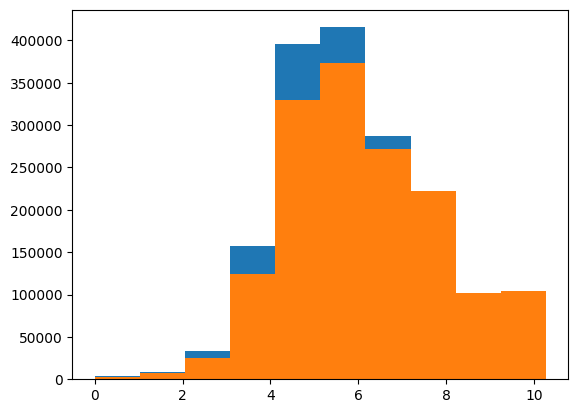

In [37]:
plt.hist(np.log(1 + abs(np.clip(df[df["gender"]==0]["amount"], lower, upper))))
plt.hist(np.log(1 + abs(np.clip(df[df["gender"]==1]["amount"], lower, upper))))

In [47]:
df[df["gender"]==0]["trans_type"].value_counts().iloc[:10]

1010    404101
1030    263593
2010    259628
1110    212696
7070    155586
2370     90338
7010     67728
7030     41037
1100     26057
2330     19285
Name: trans_type, dtype: int64

In [49]:
df[df["gender"]==1]["trans_type"].value_counts().iloc[:10]

1010    360511
2010    244300
1110    231153
1030    197765
7070    148139
2370     82066
7010     59742
1100     30455
7030     27956
7071     25272
Name: trans_type, dtype: int64

In [54]:
df.groupby("mcc_code")["gender"].agg(["mean", "count"]).sort_values("count", ascending=False).iloc[: 10]

,mean,count
mcc_code,,
6011,0.488591,701877
4814,0.430271,468844
5411,0.470354,463466
6010,0.487344,448271
4829,0.482821,289306
5499,0.473897,159577
5541,0.735494,69488
5912,0.366750,65118
5331,0.437836,63003


In [46]:
df["trans_type"]

0          2370
1          2370
2          1030
3          2010
4          2010
           ... 
3238727    1030
3238728    7010
3238729    2010
3238730    2010
3238731    2370
Name: trans_type, Length: 3238732, dtype: int64